# Data Science - Assignment 1

## Ather Fawaz [17L-4004]
## Muhammad Wasiq Malik [17L-6315]

## Part 1: Linear Regression with One Variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def cost_function(X, Y, theta):
    samples = Y.size
    cost = 0
    h = np.dot(X, theta)
    cost = (1/(2 * samples)) * np.sum(np.square(np.dot(X, theta) - Y))
    return cost

def gradient_descent(X, Y, theta, learning_rate, iterations):
    samples = Y.shape[0]
    theta = theta.copy()
    for i in range(iterations):
        theta = theta - (learning_rate / samples) * \
            (np.dot(X, theta) - Y).dot(X)
        cost = cost_function(X, Y, theta)
        #print(f'Cost: {cost:.3f}')
    return theta, cost

def fetch_dataset(file_name, delimiter=','):
    X = np.array([])
    Y = np.array([])
    file = open(file_name)
    for line in file:
        temp = line.split(delimiter)
        X = np.append(X, float(temp[0]))
        temp[1] = temp[1].replace('\n', '')
        Y = np.append(Y, float(temp[1]))
    file.close()
    return X, Y

def plot_data(X, Y, predicted=None):
    plt.scatter(X, Y, marker='x', c='r')
    plt.title('Scatter Plot')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    if predicted is not None:
        plt.plot(X, predicted, '-')
        plt.legend(['Training data', 'Linear Regression'])
    plt.show()

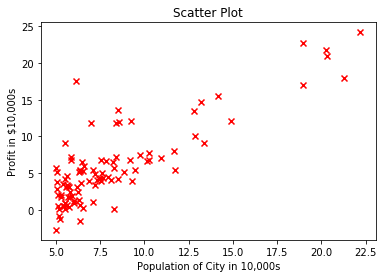

Thetas:  [-3.77878177  1.18127981]
Final cost:  4.4782175955798635


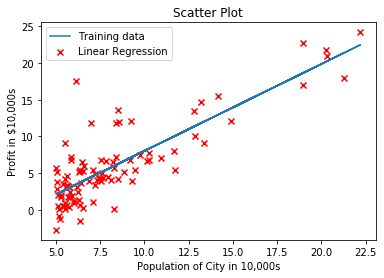

In [3]:
def main():

    # fetching
    X, Y = fetch_dataset('ex1data1.txt')
    samples = Y.size

    # plotting data
    plot_data(X, Y)

    # adding dummy value to X
    X = np.stack([np.ones(samples), X], axis=1)
    theta = np.zeros(2)

    # initializing theta to random values
    theta[0] = random.uniform(0, 1)
    theta[1] = random.uniform(0, 1)

    # hyperparameters
    learning_rate = 0.01
    iterations = 2000

    # running gradient descent
    theta, cost = gradient_descent(X, Y, theta, learning_rate, iterations)

    # printing results
    print('Thetas: ', theta)
    print('Final cost: ', cost)

    # plotting the line of regression
    predicted = np.dot(X, theta)
    plot_data(X[:, 1], Y, predicted)

if __name__ == "__main__":
    main()

## Part II: Linear Regression with Multiple Variables

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [5]:
def fetch_dataset(file_name, delimiter=','):
    dataset = pd.read_csv(file_name, delimiter, header=None)
    Y = dataset.iloc[:, -1:]
    X = dataset.iloc[:, : -1]
    return np.array(X), np.array(Y)

def normalize_data(array):
    mean = np.mean(array, axis=0)
    std = np.std(array, axis=0)
    return ((array - mean) / std), mean, std


def cost_function(X, Y, theta):
    samples = Y.size
    cost = 0
    cost = (1/(2 * samples)) * \
        np.sum(np.square(np.dot(X, theta) - Y))
    return cost


def gradient_descent(X, Y, theta, learning_rate, iterations):
    count = iterations
    samples = len(Y)
    theta = theta.copy()
    cost = []
    for i in range(2):
        theta = theta - (learning_rate / samples) * \
            np.transpose(X).dot(np.dot(X, theta) - Y)
        cost.append(cost_function(X, Y, theta))
        iterations -= 1
    while iterations and (cost[count - iterations - 2] - cost[count - iterations - 1] > 0.001):
        theta = theta - (learning_rate / samples) * \
            np.transpose(X).dot(np.dot(X, theta) - Y)
        cost.append(cost_function(X, Y, theta))
        iterations -= 1
    return theta, cost


def plot_cost(cost):
    plt.plot(list(range(len(cost))), cost, '-')
    plt.title('Cost VS Iterations')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()


def predict(features, theta, x_mean, x_std):
    features = np.subtract(features, x_mean) / x_std
    features = np.hstack([np.ones(1), features])
    return np.dot(features, theta)

Thetas:  [[340412.65957447]
 [109447.56323169]
 [ -6578.12161621]]


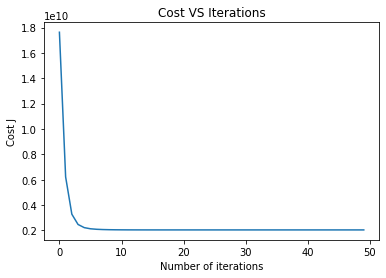

Cost for a house of area 1650 square feet with three bedrooms:  293081


In [6]:
def main():

    # fetch dataset
    X, Y = fetch_dataset('ex1data2.txt')
    sample_count = len(Y)
    feature_count = X.shape[1]

    # norms
    X, x_mean, x_std = normalize_data(X)

    # thetas
    X = np.hstack([np.ones((sample_count, 1)), X])
    theta = np.random.rand(feature_count + 1, 1)

    # hyperparameters
    learning_rate = 0.5
    iterations = 50

    # running gradient descent
    theta, cost = gradient_descent(X, Y, theta, learning_rate, iterations)

    # printing results
    print('Thetas: ', theta)
    plot_cost(cost)

    # calculating for a given value
    features = np.array([1650, 3])
    prediction = predict(features, theta, x_mean, x_std)
    print('Cost for a house of area 1650 square feet with three bedrooms: ', int(prediction))


if __name__ == "__main__":
    main()

## Part III: Normal Equation

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [8]:

def fetch_dataset(file_name, delimiter=','):
    dataset = pd.read_csv(file_name, delimiter, header=None)
    Y = dataset.iloc[:, -1:]
    X = dataset.iloc[:, : -1]
    return np.array(X), np.array(Y)


def normal_equation(X, Y):
    temp = np.dot(np.transpose(X), X)
    temp = np.linalg.inv(temp)
    temp2 = np.dot(np.transpose(X), Y)
    return np.dot(temp, temp2)


def predict(features, theta):
    features = np.hstack([np.ones(1), features])
    return np.dot(features, theta)

In [9]:
def main():
    X, Y = fetch_dataset('ex1data2.txt')
    sample_count = len(Y)
    X = np.hstack([np.ones((sample_count, 1)), X])
    feature_count = X.shape[1]
    theta = normal_equation(X, Y)
    features = np.array([1650, 3])
    prediction = predict(features, theta)
    print('Cost for a house of area 1650 square feet with three bedrooms: ', int(prediction))


if __name__ == "__main__":
    main()

Cost for a house of area 1650 square feet with three bedrooms:  293081
